# Exam 15/01/2021
## 1. Load the data and separate in X all the columns but the last one, in y the last column, then produce a pairplot of X and comment what you see 

In [99]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

random_state=42

In [100]:
#load data and inspect head
df=pd.read_csv("exam_2021_01_15.csv")
df.head()

,A0,A1,A2,y
0,2067.582042,-15.259519,0.020472,2
1,1319.589579,-18.412320,0.521308,0
2,1170.212183,-19.470602,0.814986,0
3,1424.162191,9.867841,0.848751,1
4,1551.069098,11.809364,0.884964,1


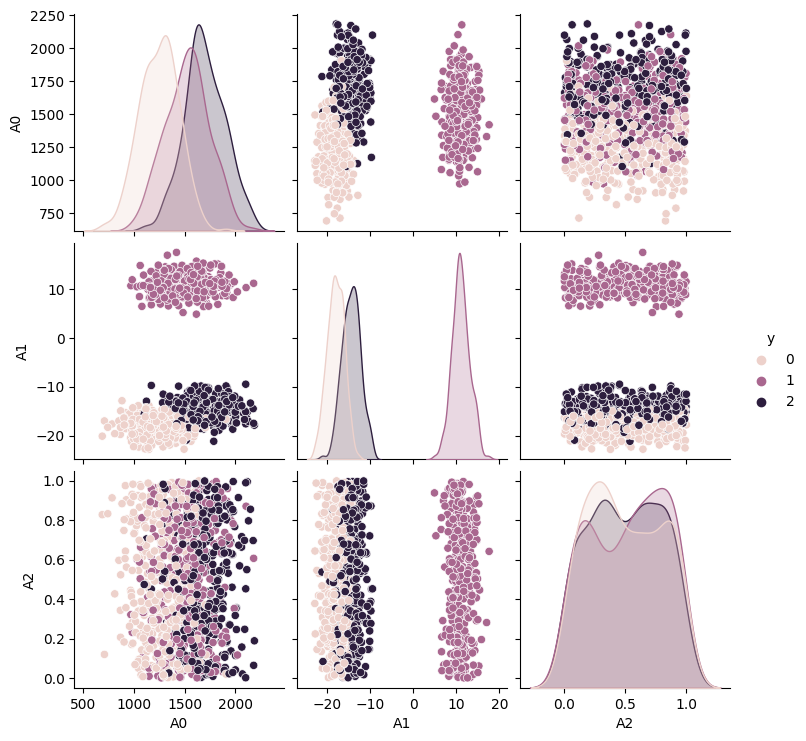

In [101]:
#divide into X and y and pairplot X
X=df.drop("y", axis=1) 
y=df["y"]
sns.pairplot(df, hue="y")

Text(0.5, 0.92, '3D scatter plot of X coulored by y')

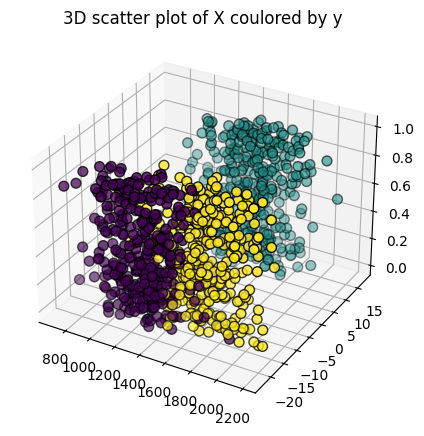

In [102]:
fig=plt.figure(figsize=(10,5))
ax = fig.add_subplot( projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("3D scatter plot of X coulored by y")

From the pairplot, it's evident that the distributions for features A0, A1 and A2 are not skewed, and there aren't many outliers, although the scale of A0 is much different from the others (this is particulary evident when plotting the boxplot)

## 2. find the best clustering scheme for X with a method of your choice, plot the silhouhette index for an appropriate range of parameters and show the chosen hyperparameter(s)  
### 1. consider carefully the number of clusters, simple optimisation of the silhouette will not be enough, decide visually the best number of clusters

Using K-Means, I will try to fit the model varying the hyperparameter "n_clusters" from 2 to 11

In [103]:
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
k_range = list(range(2,7)) # set the range of k values to test 
parameters_km = [{'n_clusters': k_range}]
pg = list(ParameterGrid(parameters_km))
inertias_km = []
silhouette_scores_km = []
#iterate over all possible hyperparameters
for i in range(len(pg)):
    km = KMeans(**(pg[i]), random_state=random_state)
    y_km = km.fit_predict(X)
    inertias_km.append(km.inertia_)
    silhouette_scores_km.append(silhouette_score(X,y_km))
#show the inertia graph


Text(0.5, 0, 'n_clusters')

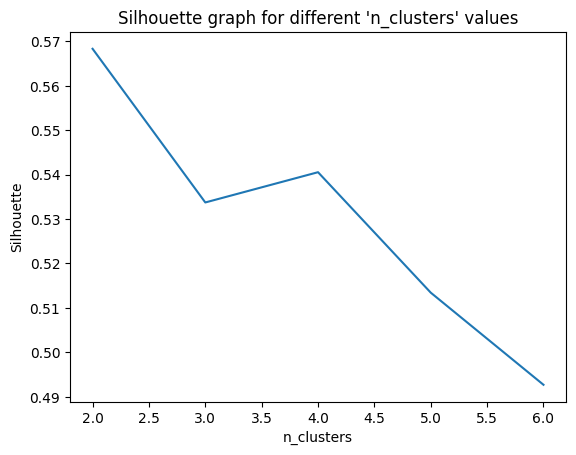

In [104]:

plt.plot(k_range, silhouette_scores_km)

plt.title("Silhouette graph for different 'n_clusters' values")
plt.ylabel("Silhouette")
plt.xlabel("n_clusters")


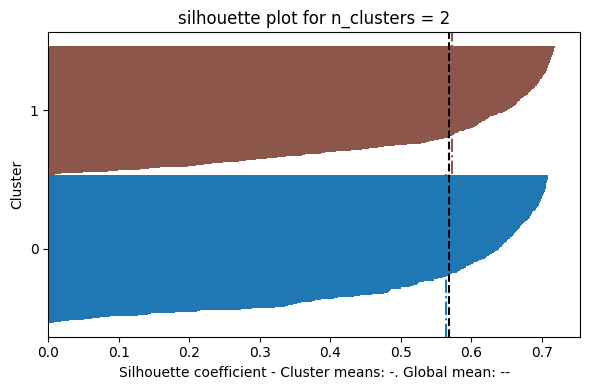

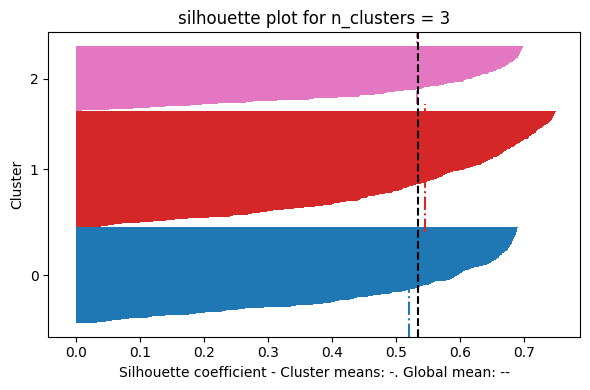

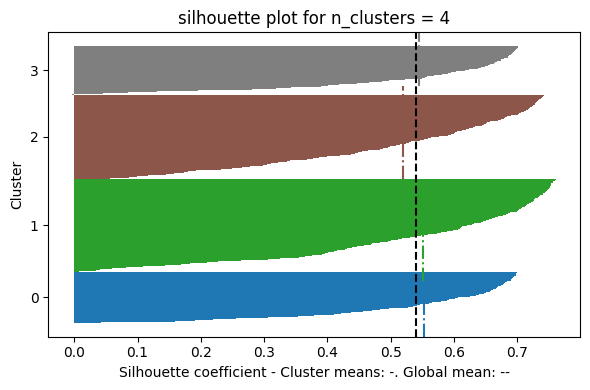

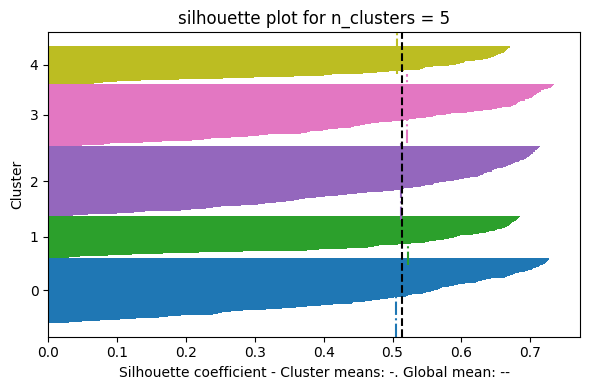

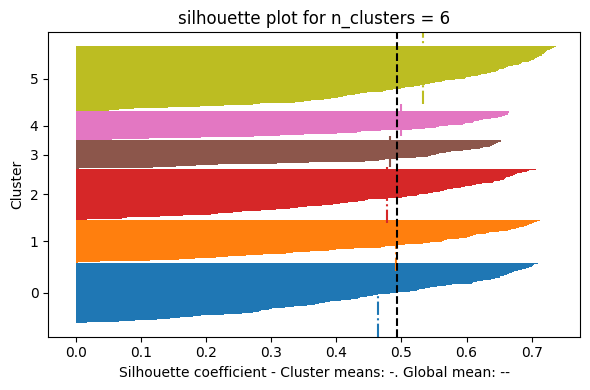

In [105]:
#this is probably not necessary
from plot_silhouette_w_mean import plot_silhouette
from sklearn.metrics import silhouette_samples
for i in k_range:
    plt.figure(figsize=(6, 4))
    plt.title("silhouette plot for n_clusters = {}".format(i))
    km = KMeans(n_clusters=i, random_state=random_state)
    y_km = km.fit_predict(X)
    silhouette_vals = silhouette_samples(X, y_km)
    plot_silhouette(silhouette_vals, y_km)


The highest value for the silhouette is 2, but by visually looking the pairplot with `hue="y"`, the optimal number for n_clusters should be 3

## 3. fit the clustering scheme store the cluster labels in y_km and output the silhouette score   

In [106]:
model=KMeans(n_clusters=3, random_state=random_state)
y_km=model.fit_predict(X)
print("Silhouette score for n_clusters=3: {}".format(silhouette_score(X,y_km)))

Silhouette score for n_clusters=3: 0.5337106344943366


## 4.  use the labels in the last column of the input file as the “gold standard” for the clustering and compare y_km and y; for an effective comparison, each label in y_km must be remapped to the best label in y; compute and apply this re-mapping
### 1.  hint for each subset of the data with x in y_km find the most frequent label in y 

In [107]:
# show accuracy comparing to y
from sklearn.metrics import accuracy_score
print("Accuracy score: {}".format(accuracy_score(y,y_km)))
#show confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix: \n{}".format(confusion_matrix(y,y_km)))


Accuracy score: 0.587
Confusion matrix: 
[[242  89   3]
 [ 84 181  68]
 [ 19 150 164]]


Text(0.5, 0.92, 'gold standard')

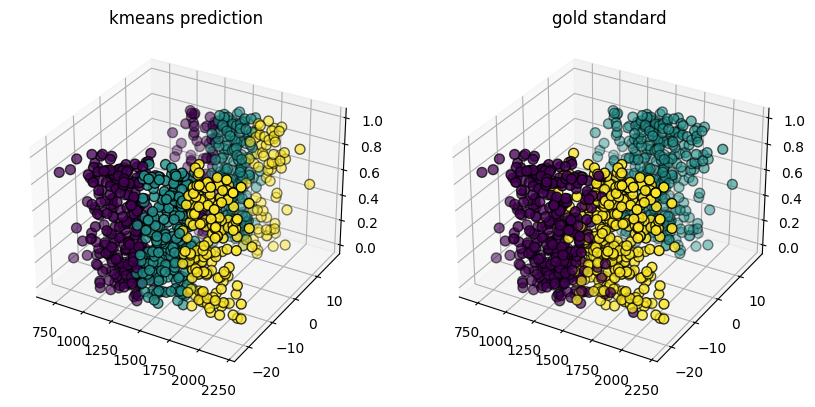

In [108]:
#3d plot X with matplotlib, 2 subplots, one with y_km and one with y
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y_km, cmap='viridis', edgecolor='k', s=50)
ax.set_title("kmeans prediction")
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap='viridis', edgecolor='k', s=50)
ax.set_title("gold standard")

## 6.  consider possible pre-processing actions, repeat the fitting and evaluate as before the result of the new fitting
Since the first column has a totally different scale, i would consider useful rescaling (also KMeans is very sensible to data scale).
Since A2 is in scale [0,1], A0 and A1 will be remapped in that domain with `MinMaxScaler`

In [109]:
# remap on the 0:1 range with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



<AxesSubplot: >

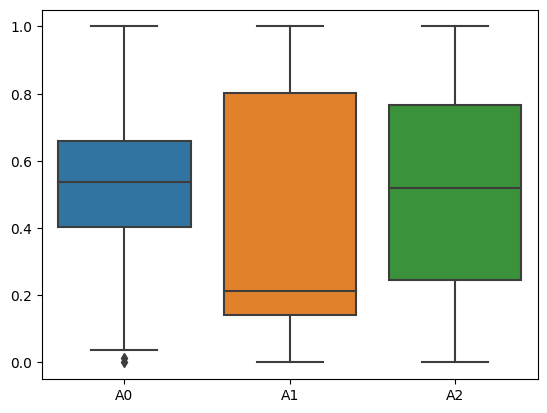

In [110]:
sns.boxplot(X)

In [111]:
# training the new model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
model=KMeans(n_clusters=3, random_state=random_state)
y_km=model.fit_predict(X)
print("Silhouette score for rescaled data: {}".format(silhouette_score(X,y_km)))
print("Accuracy: {}".format(accuracy_score(y,y_km)))
print("Confusion matrix: \n{}".format(confusion_matrix(y,y_km)))

Silhouette score for rescaled data: 0.4279385440884642
Accuracy: 0.676
Confusion matrix: 
[[176   0 158]
 [  0 333   0]
 [166   0 167]]


Text(0.5, 0.92, 'gold standard')

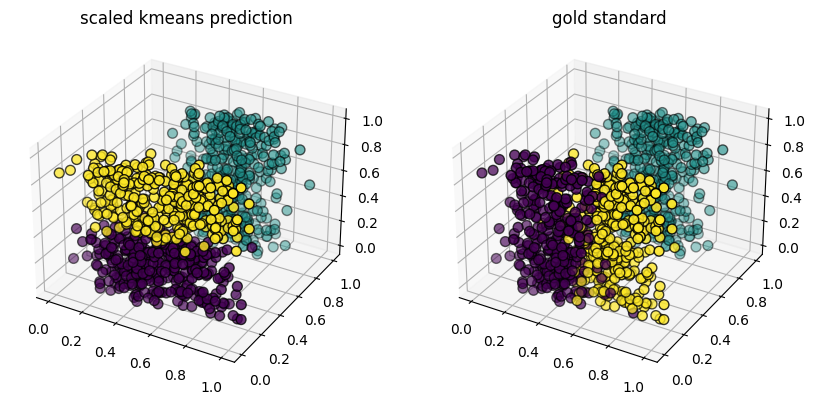

In [112]:
#3d plot X with matplotlib, 2 subplots, one with y_km and one with y
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y_km, cmap='viridis', edgecolor='k', s=50)
ax.set_title("scaled kmeans prediction")
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap='viridis', edgecolor='k', s=50)
ax.set_title("gold standard")

As we can see, it's now able to separate the two big clusters (green from the other two), but still couldn't figure how to divide the purple from the yellow one (labels 0 and 2)

Also even though the silhouette score is lower for the n_cluster=3 case, the accuracy is actually higher. This is because the distance from the clusters is reduced